In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
score_df1 = pd.read_csv("test_results_sentence_transformers_grader1.csv")
score_df2 = pd.read_csv("test_results_sentence_transformers_grader2.csv")
score_df3 = pd.read_csv("test_results_stats_grader2.csv")
score_df3.dropna()

,show_id,episode_id,seg_num,words,score,Grader: Svante


In [40]:
score_df3.head(8)

,show_id,episode_id,seg_num,words,score,Grader: Svante
0,Topic 9,NaN,query: trump call ukrainian president,query: The White House released a rough transc...,NaN,NaN
1,show_61fn05IS5R9ugt5ECJanSb,6O8djf3RL94yNfaoWqvk3r,30,"See, however Morales can resolve the situatio...",2.0,NaN
2,show_61fn05IS5R9ugt5ECJanSb,6O8djf3RL94yNfaoWqvk3r,31,He said there had never been a president who h...,3.0,NaN
3,show_2k5u94g2BHSQFQeHkIBXtR,1nu9RsgfYsbNb7CDmHlvKx,58,I don't like those guys. Those guys are my bo...,3.0,NaN
4,show_2k5u94g2BHSQFQeHkIBXtR,1nu9RsgfYsbNb7CDmHlvKx,61,so he's going after Biden. So he's basically ...,2.0,NaN
5,show_00iaP2GhJUWHAovx41BN5N,2VVBXyGRGd2cydXPxHJme6,7,"Underway, some say is conversation with Ukrai...",1.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,Topic 10,NaN,query: boeing 737 crash causes,query: The Boeing 737 MAX passenger airliner w...,NaN,NaN


In [20]:
def downgrade(x):
    if x > 3:
        return 3
    else:
        return x
score_df1['score'] = score_df1['score'].apply(downgrade)

In [50]:
topic_id = score_df1['topic_ID'].tolist()
score_1 = score_df1['score'].tolist()
score_2 = score_df2['score'].tolist()
score_3 = score_df3['score'].tolist()
score_3 = [int(i) for i in score_3 if i <=3] + [0]

topics = list(set(topic_id))

In [51]:
rslt1 = {}
rslt2 = {}
rslt3 = {}

for topic in topics:
    rslt1[topic] = []
    rslt2[topic] = []
    rslt3[topic] = []
    
    for idx, tp in enumerate(topic_id):
        if tp == topic:
            rslt1[topic].append(score_1[idx])
            rslt2[topic].append(int(score_2[idx])) 
            rslt3[topic].append(int(score_3[idx]))              

In [52]:
rslt1_cnt = {}
for k, v in rslt1.items():
    rslt1_cnt[k] = []
    rslt1_cnt[k].append(v.count(0))
    rslt1_cnt[k].append(v.count(1))
    rslt1_cnt[k].append(v.count(2))
    rslt1_cnt[k].append(v.count(3))
    

rslt2_cnt = {}
for k, v in rslt2.items():
    rslt2_cnt[k] = []
    rslt2_cnt[k].append(v.count(0))
    rslt2_cnt[k].append(v.count(1))
    rslt2_cnt[k].append(v.count(2))
    rslt2_cnt[k].append(v.count(3))
    
rslt3_cnt = {}
for k, v in rslt3.items():
    rslt3_cnt[k] = []
    rslt3_cnt[k].append(v.count(0))
    rslt3_cnt[k].append(v.count(1))
    rslt3_cnt[k].append(v.count(2))
    rslt3_cnt[k].append(v.count(3))

### rslt1

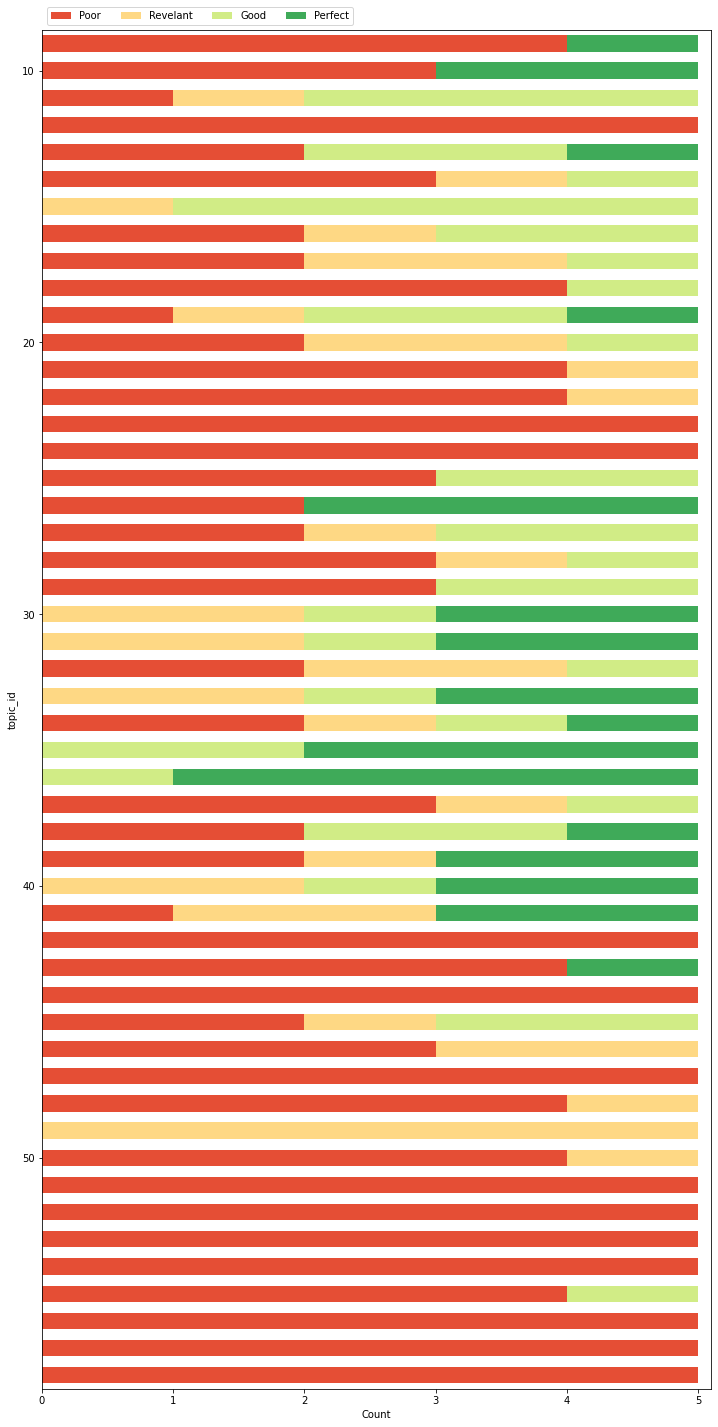

In [17]:
labels = list(rslt2_cnt.keys())

category_names = ['Poor', 'Revelant',
                  'Good', 'Perfect']

data = np.array(list(rslt1_cnt.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))


fig, ax = plt.subplots(figsize=(12, 25))

ax.invert_yaxis()
ax.set_xlim(0, np.sum(data, axis=1).max()+0.1)
ax.set_ylim(0.5+58,9-0.5)
ax.set_xlabel('Count')
ax.set_ylabel('topic_id')

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.6,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color


    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium')



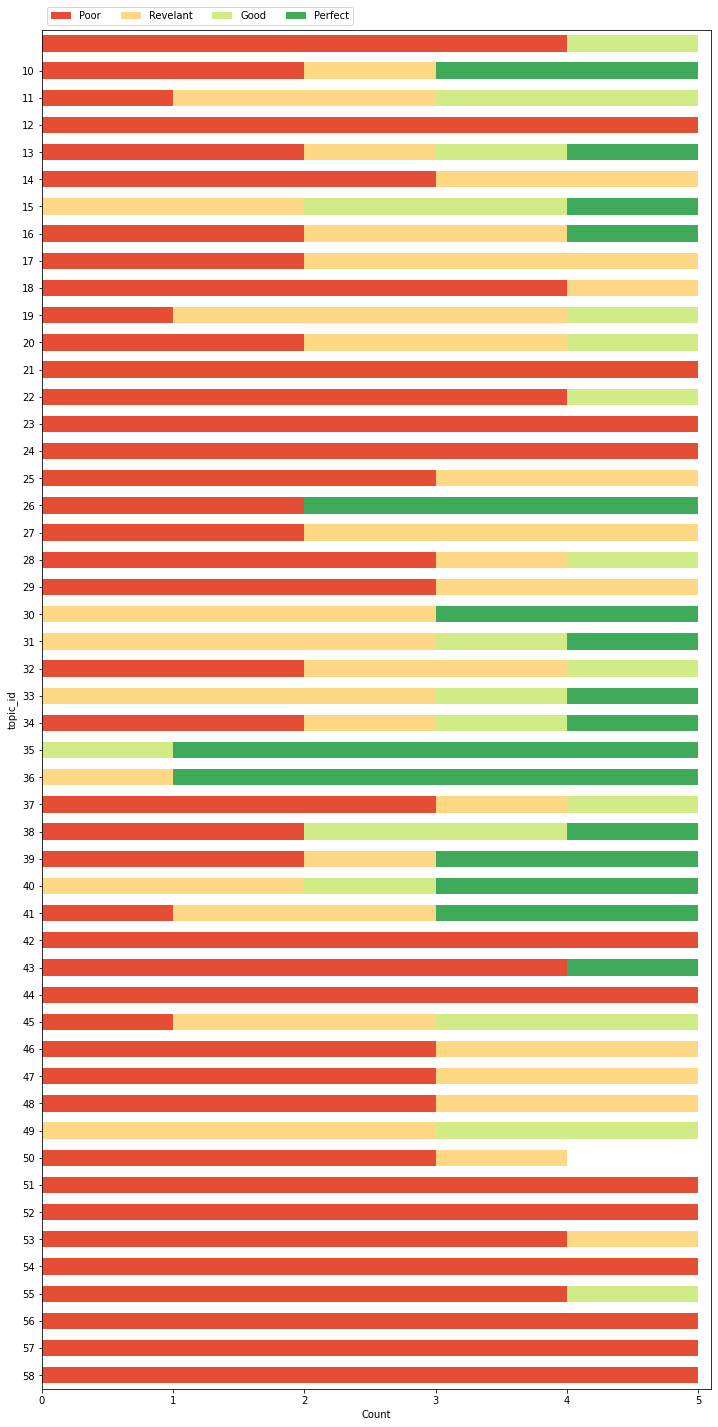

In [55]:
labels = list(rslt1_cnt.keys())

category_names = ['Poor', 'Revelant',
                  'Good', 'Perfect']

data = np.array(list(rslt2_cnt.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))


fig, ax = plt.subplots(figsize=(12, 25))
ax.set_yticks(np.arange(len(labels))+10)

ax.invert_yaxis()
ax.set_xlim(0, np.sum(data, axis=1).max()+0.1)
ax.set_ylim(0.5+58,9-0.5)
ax.set_xlabel('Count')
ax.set_ylabel('topic_id')

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.6,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color


    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium')



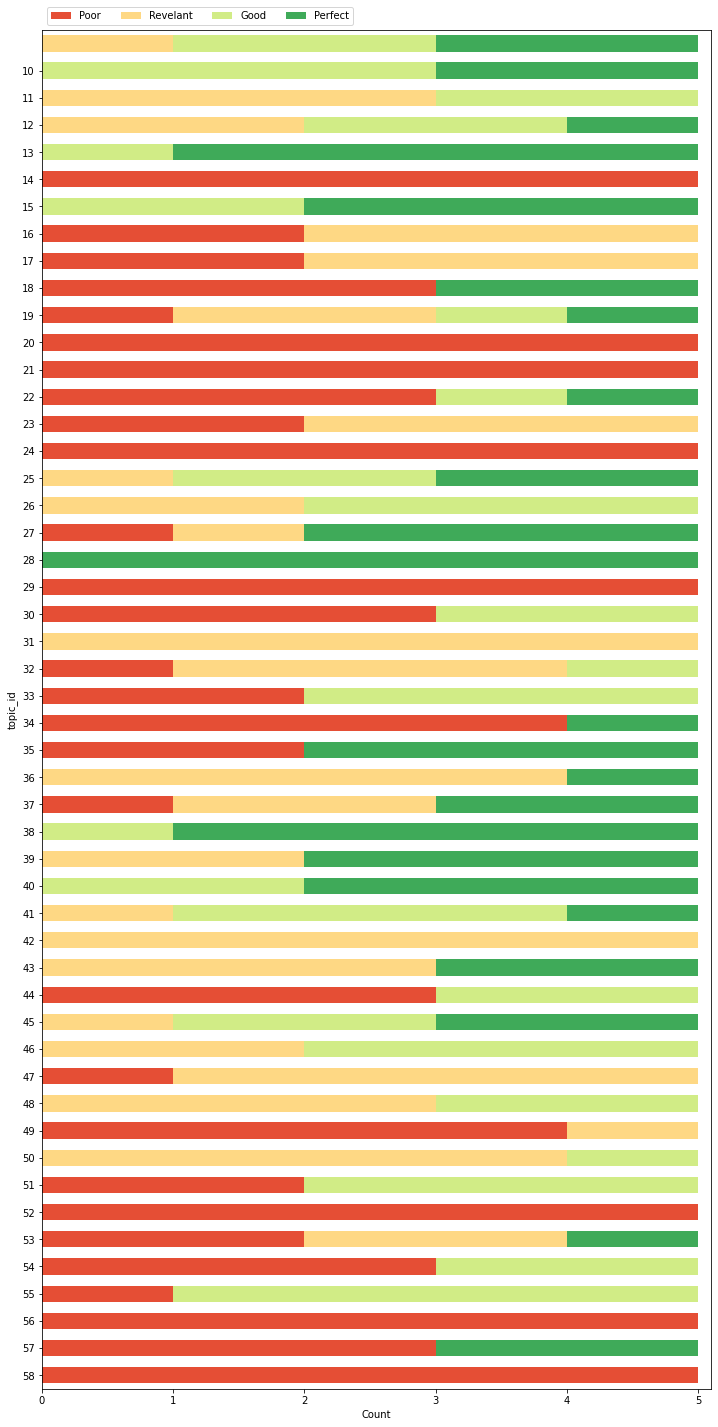

In [56]:
labels = list(rslt1_cnt.keys())

category_names = ['Poor', 'Revelant',
                  'Good', 'Perfect']

data = np.array(list(rslt3_cnt.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))


fig, ax = plt.subplots(figsize=(12, 25))
ax.set_yticks(np.arange(len(labels))+10)

ax.invert_yaxis()
ax.set_xlim(0, np.sum(data, axis=1).max()+0.1)
ax.set_ylim(0.5+58,9-0.5)
ax.set_xlabel('Count')
ax.set_ylabel('topic_id')

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.6,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color


    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium')

